In [1]:
## Preparing the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
from matplotlib import cm
import psychopy
from psychopy.tools.filetools import fromFile

/Users/egor/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Loading the data:

In [3]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mc2_tgT-mcBv2'
#condName = 'mc2_tgT-mcBv_peri'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName + '*'))
print dataDir
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
print allSubjDirs
stairs = pd.DataFrame()
# matrices for intensities, responses, and means of reversals:
intns, resps, thisRevs, revMeans = [],[],[],[] 
orderInfo = pd.DataFrame() # subj, session, and stair info for ordering intns & resps

/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv2*
['/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv2/mc2_tgT-mcBv2_cent_p0_s1_2017-02-18_1046', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv2/mc2_tgT-mcBv2_cent_p16_s2_2017-02-18_1401', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv2/mc2_tgT-mcBv2_cent_p17_s1_2017-02-18_1452', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv2/mc2_tgT-mcBv2_cent_p18_s2_2017-02-18_1703', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv2/mc2_tgT-mcBv2_cent_p19_s2_2017-02-20_1333', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv2/mc2_tgT-mcBv2_cent_p1_s2_2017-02-21_1439', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv2/mc2_tgT-mcBv2_cent_p20_s1_2017-02-21_1508', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv2/mc2_tgT-mcBv2_cent_p9_s1_2017-02-20_1039', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv2/mc2_tgT-mcBv2_peri_p0_s2_2017-02-18_1114', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv2/mc2_tgT-mcBv2_peri_p16_s1_2017-02-1

In [4]:
for subjDir in allSubjDirs:
    print subjDir
    subjStairsPath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    subjStairs = pd.read_csv(subjStairsPath)
    stairs = stairs.append(subjStairs)
    #print subjStairs
    for subjStairLabel in subjStairs['stairLabel']:
        #print subjStairLabel #thisSubjStair['label']
        thisStair = fromFile(subjDir + '/' + subjStairLabel + '.psydat')
        intns.append(thisStair.intensities)
        resps.append(thisStair.data)
        theseRevIntns = thisStair.reversalIntensities #detectRevs(thisStair)
        #print np.round(theseRevIntns,1)
        revMeans.append([np.average(thisStair.reversalIntensities[-4:]),
                         np.average(thisStair.reversalIntensities[-6:]),
                         np.average(thisStair.reversalIntensities[-8:])])
        orderInfo = orderInfo.append(pd.DataFrame({
                    'participant': subjStairs.participant[0],
                    'mcBv': thisStair.extraInfo['mcBv'],
                    'targTpeak': thisStair.extraInfo['targTpeak'],
                    'targXoff2': thisStair.extraInfo['targXoff2'],
                    'targV': thisStair.extraInfo['targV'],
                    'stairStart': [thisStair.extraInfo['startContr']]
                    }))
                    #'sessionLabel': os.path.basename(subjStairsPath)[:-20],
                    #'stairLabel': [subjStairLabel]
        #print np.round(thisStair.intensities,2)
        #print thisStair.data # responses (correct/incorrect)
        #print thisStair.extraInfo

/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv2/mc2_tgT-mcBv2_cent_p0_s1_2017-02-18_1046
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv2/mc2_tgT-mcBv2_cent_p16_s2_2017-02-18_1401
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv2/mc2_tgT-mcBv2_cent_p17_s1_2017-02-18_1452
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv2/mc2_tgT-mcBv2_cent_p18_s2_2017-02-18_1703
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv2/mc2_tgT-mcBv2_cent_p19_s2_2017-02-20_1333
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv2/mc2_tgT-mcBv2_cent_p1_s2_2017-02-21_1439
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv2/mc2_tgT-mcBv2_cent_p20_s1_2017-02-21_1508
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv2/mc2_tgT-mcBv2_cent_p9_s1_2017-02-20_1039
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv2/mc2_tgT-mcBv2_peri_p0_s2_2017-02-18_1114
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv2/mc2_tgT-mcBv2_peri_p16_s1_2017-02-18_1338
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv2/mc2_tgT-mcBv2_peri_p17_

In [5]:
stairs['condLabel'] = 'mcBv-' + stairs.mcBv.astype(str) + '_' + \
                      'tgEcc-' + stairs.targXoff2.astype(str) + '_' + \
                      'tgV-' + stairs.targV.astype(str) + '_' + \
                      'tgT-' + stairs.targTpeak.astype(str)
print stairs.shape
print stairs.columns
stairs.head(5)

(320, 29)
Index([u'expName', u'expPara', u'time', u'participant', u'dom', u'session',
       u'nRevs', u'mcSz', u'mcSf', u'mcBv', u'mcBsf', u'mcPeriGap',
       u'mcPeriFade', u'targSz', u'targSf', u'targOri1', u'targOri2',
       u'targXoff1', u'targXoff2', u'targYoff', u'targV', u'targTtot',
       u'targTpeak', u'trialT', u'fixCross', u'stairLabel', u'stairStart',
       u'meanRev6', u'condLabel'],
      dtype='object')


,expName,expPara,time,participant,dom,session,nRevs,mcSz,mcSf,mcBv,...,targYoff,targV,targTtot,targTpeak,trialT,fixCross,stairLabel,stairStart,meanRev6,condLabel
0,mc2_tgT-mcBv2,cent,2017-02-18_1046,0,0,1,10,256,0.1,0.01,...,0,0,0.66,0.66,2,1,st0.0_mcBv0.01_targTpeak0.66,0.0,-1.545000,mcBv-0.01_tgEcc-28_tgV-0_tgT-0.66
1,mc2_tgT-mcBv2,cent,2017-02-18_1046,0,0,1,10,256,0.1,0.01,...,0,0,0.66,0.33,2,1,st0.0_mcBv0.01_targTpeak0.33,0.0,-1.418333,mcBv-0.01_tgEcc-28_tgV-0_tgT-0.33
2,mc2_tgT-mcBv2,cent,2017-02-18_1046,0,0,1,10,256,0.1,0.01,...,0,0,0.66,0.66,2,1,st-2.5_mcBv0.01_targTpeak0.66,-2.5,-1.596667,mcBv-0.01_tgEcc-28_tgV-0_tgT-0.66
3,mc2_tgT-mcBv2,cent,2017-02-18_1046,0,0,1,10,256,0.1,0.01,...,0,0,0.66,0.33,2,1,st-2.5_mcBv0.01_targTpeak0.33,-2.5,-1.396667,mcBv-0.01_tgEcc-28_tgV-0_tgT-0.33
4,mc2_tgT-mcBv2,cent,2017-02-18_1046,0,0,1,10,256,0.1,0.01,...,0,0,0.66,1.66,2,1,st-2.5_mcBv0.01_targTpeak1.66,-2.5,-1.696667,mcBv-0.01_tgEcc-28_tgV-0_tgT-1.66


In [6]:
print np.shape(resps)
print np.shape(intns)
print np.shape(revMeans)
orderInfo = orderInfo.reset_index(drop=True)
print orderInfo.shape
orderInfo.head(5)

(320,)
(320,)
(320, 3)
(320, 6)


,mcBv,participant,stairStart,targTpeak,targV,targXoff2
0,0.01,0,0.0,0.66,0,28
1,0.01,0,0.0,0.33,0,28
2,0.01,0,-2.5,0.66,0,28
3,0.01,0,-2.5,0.33,0,28
4,0.01,0,-2.5,1.66,0,28


Combining the trial data into a tall df.

In [7]:
nStairs = np.shape(resps)[0]
nTrials = []
for thisResp in resps: nTrials.append(np.shape(thisResp)[0])
nTrialsMax = np.max(nTrials)
allResps, allIntns = [], []
for i in range(nStairs):
    thisResp, thisIntn = resps[i], intns[i]
    x, y = np.empty((nTrialsMax,)), np.empty((nTrialsMax,))
    x[:], y[:] = np.NAN, np.NAN
    x[0:nTrials[i]] = np.array(thisResp)
    y[0:nTrials[i]] = np.array(thisIntn)
    allResps.append(x)
    allIntns.append(y)
orderInfoRepd = orderInfo.loc[np.repeat(orderInfo.index.values,nTrialsMax)]
print orderInfoRepd.shape
orderInfoRepd = orderInfoRepd.reset_index(drop=True)
orderInfoRepd['trialN'] = np.tile(np.linspace(1,nTrialsMax,nTrialsMax),nStairs)
orderInfoRepd['intns'] = np.array(allIntns).flatten()
orderInfoRepd['resps'] = np.array(allResps).flatten()
trials = pd.merge(orderInfoRepd, stairs, on=['participant','mcBv','targTpeak',
                                             'targXoff2', 'targV', 'stairStart'])
#trials['logIntn'] = np.log10(trials.intns)
#trials.ix[trials.intns<=0.001,'logIntn'] = np.nan
trials.head(5)

(9280, 6)


,mcBv,participant,stairStart,targTpeak,targV,targXoff2,trialN,intns,resps,expName,...,targOri1,targOri2,targXoff1,targYoff,targTtot,trialT,fixCross,stairLabel,meanRev6,condLabel
0,0.01,0,0.0,0.66,0,28,1.0,0.0,1.0,mc2_tgT-mcBv2,...,0,0,-28,0,0.66,2,1,st0.0_mcBv0.01_targTpeak0.66,-1.545,mcBv-0.01_tgEcc-28_tgV-0_tgT-0.66
1,0.01,0,0.0,0.66,0,28,2.0,-0.5,1.0,mc2_tgT-mcBv2,...,0,0,-28,0,0.66,2,1,st0.0_mcBv0.01_targTpeak0.66,-1.545,mcBv-0.01_tgEcc-28_tgV-0_tgT-0.66
2,0.01,0,0.0,0.66,0,28,3.0,-1.0,1.0,mc2_tgT-mcBv2,...,0,0,-28,0,0.66,2,1,st0.0_mcBv0.01_targTpeak0.66,-1.545,mcBv-0.01_tgEcc-28_tgV-0_tgT-0.66
3,0.01,0,0.0,0.66,0,28,4.0,-1.5,1.0,mc2_tgT-mcBv2,...,0,0,-28,0,0.66,2,1,st0.0_mcBv0.01_targTpeak0.66,-1.545,mcBv-0.01_tgEcc-28_tgV-0_tgT-0.66
4,0.01,0,0.0,0.66,0,28,5.0,-2.0,0.0,mc2_tgT-mcBv2,...,0,0,-28,0,0.66,2,1,st0.0_mcBv0.01_targTpeak0.66,-1.545,mcBv-0.01_tgEcc-28_tgV-0_tgT-0.66


In [8]:
dfStatCent = trials.ix[(trials.targXoff2<50) & (trials.targV==0)]
dfStatPeri = trials.ix[(trials.targXoff2>50) & (trials.targV==0)]

(-2.01, 0.03)

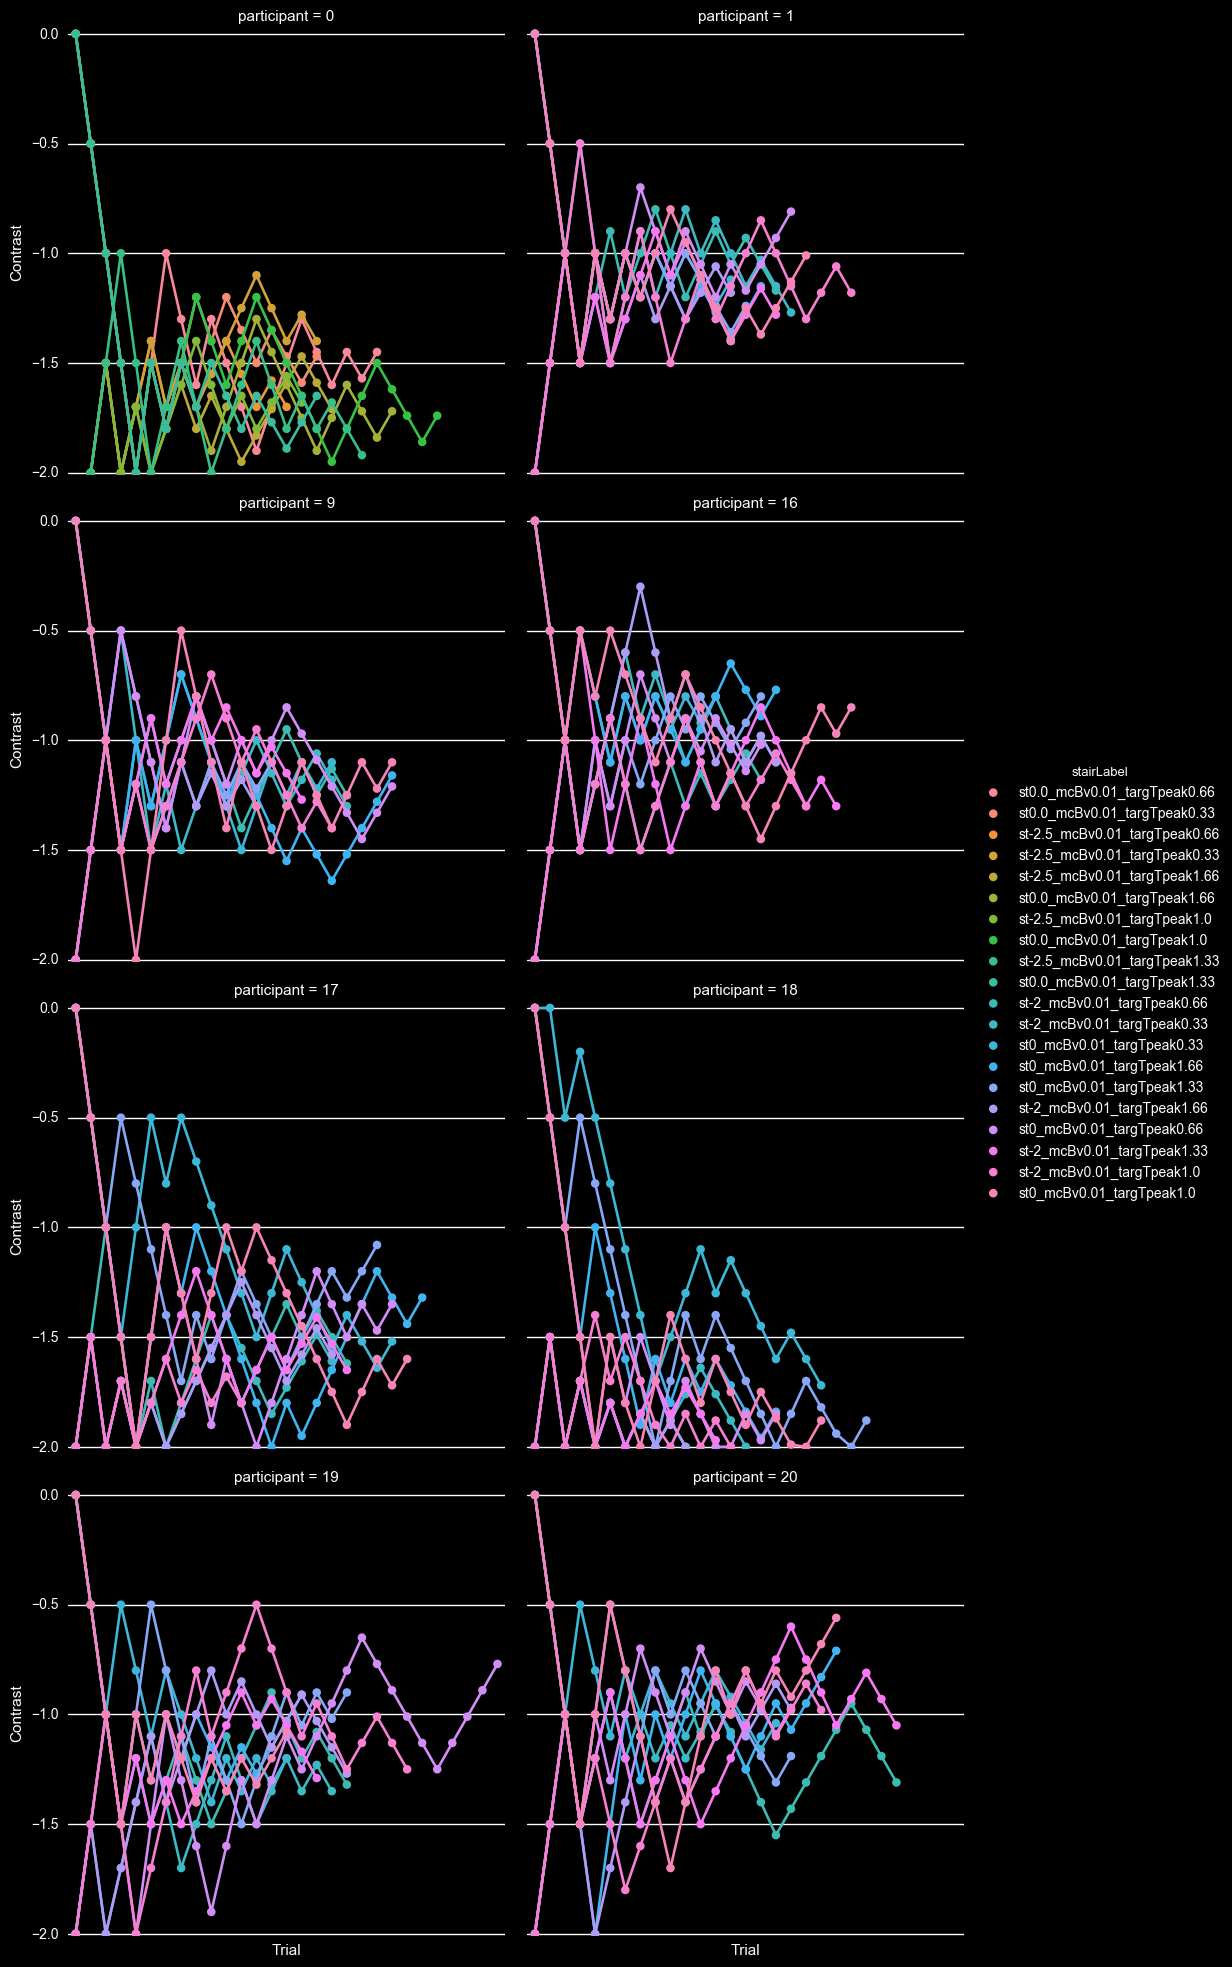

In [9]:
g = sns.factorplot(x='trialN', y='intns', hue='stairLabel', col='participant', 
                   data=dfStatCent[dfStatCent.mcBv==0.01], 
                   col_wrap=2, ci=None, kind='point', size=5, scale=.6)
g.set_axis_labels('Trial','Contrast')
g.set(xticks=[])
plt.ylim(-2.01,0.03)

(-2.01, 0.03)

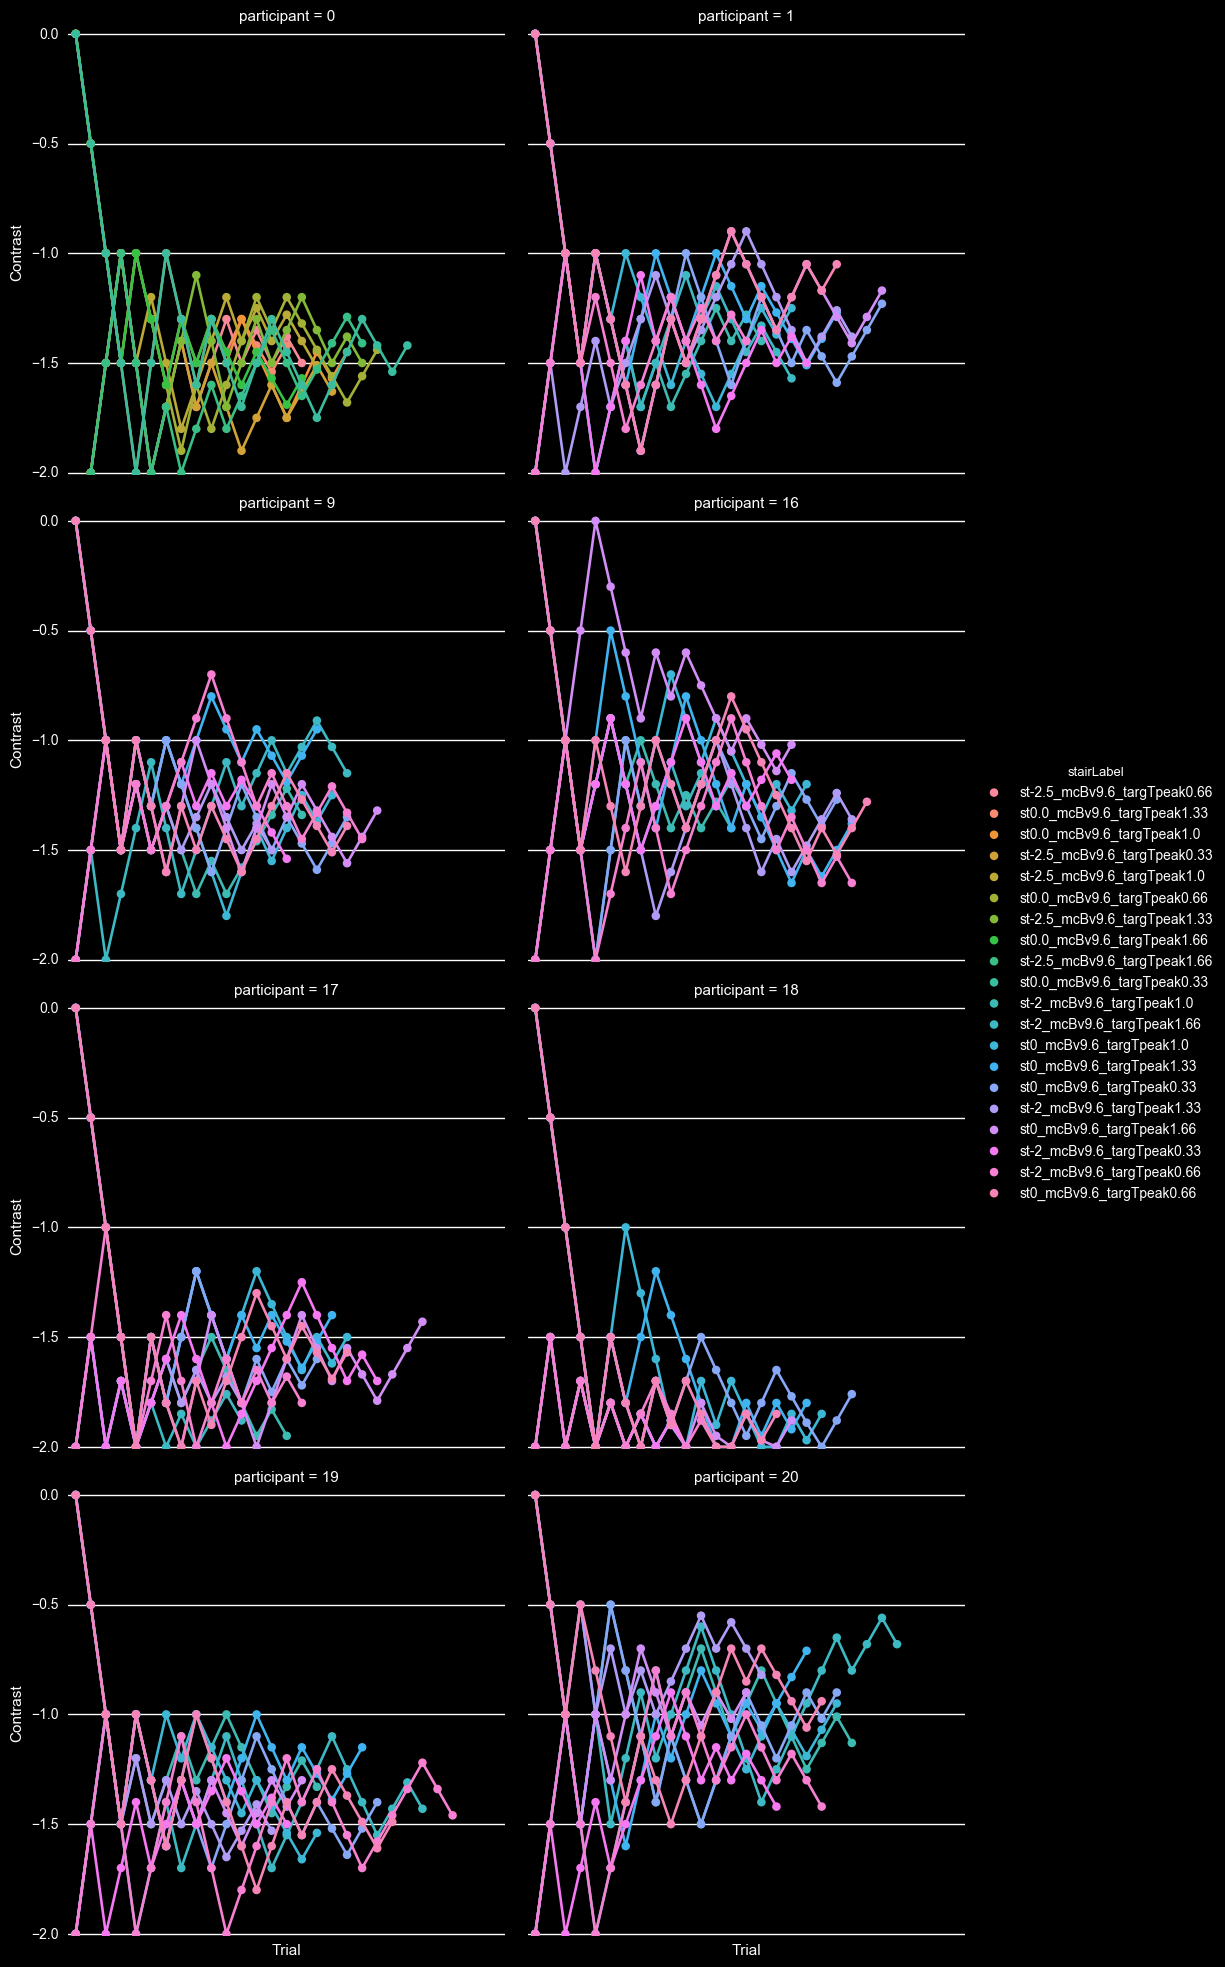

In [10]:
g = sns.factorplot(x='trialN', y='intns', hue='stairLabel', col='participant', 
                   data=dfStatCent[dfStatCent.mcBv==9.6], 
                   col_wrap=2, ci=None, kind='point', size=5, scale=.6)
g.set_axis_labels('Trial','Contrast')
g.set(xticks=[])
plt.ylim(-2.01,0.03)

(-2.01, 0.03)

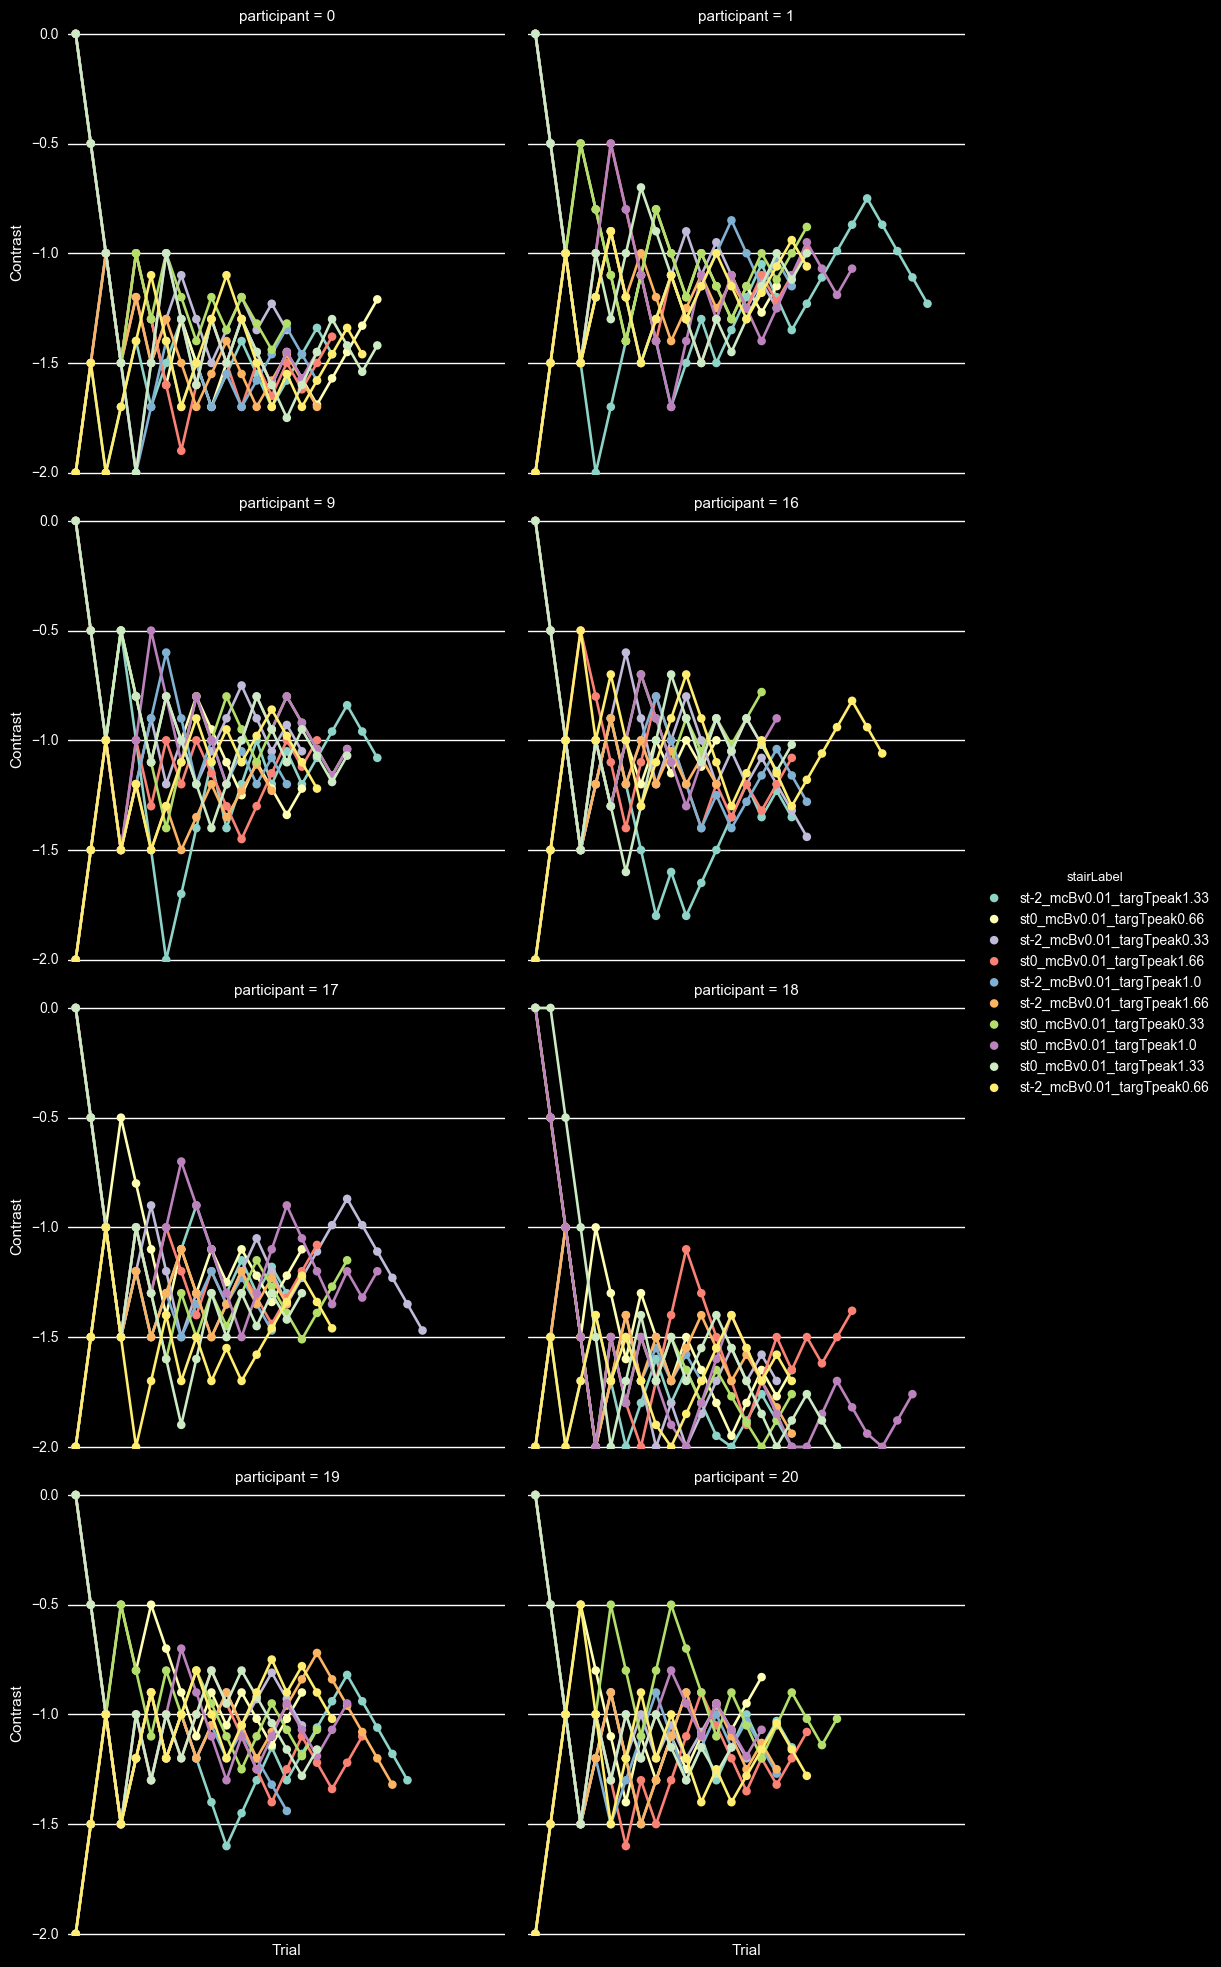

In [11]:
g = sns.factorplot(x='trialN', y='intns', hue='stairLabel', col='participant',
                   data=dfStatPeri[dfStatPeri.mcBv==0.01],
                   col_wrap=2, ci=None, kind='point', size=5, scale=.6)
g.set_axis_labels('Trial','Contrast')
g.set(xticks=[])
plt.ylim(-2.01,0.03)

(-2.01, 0.03)

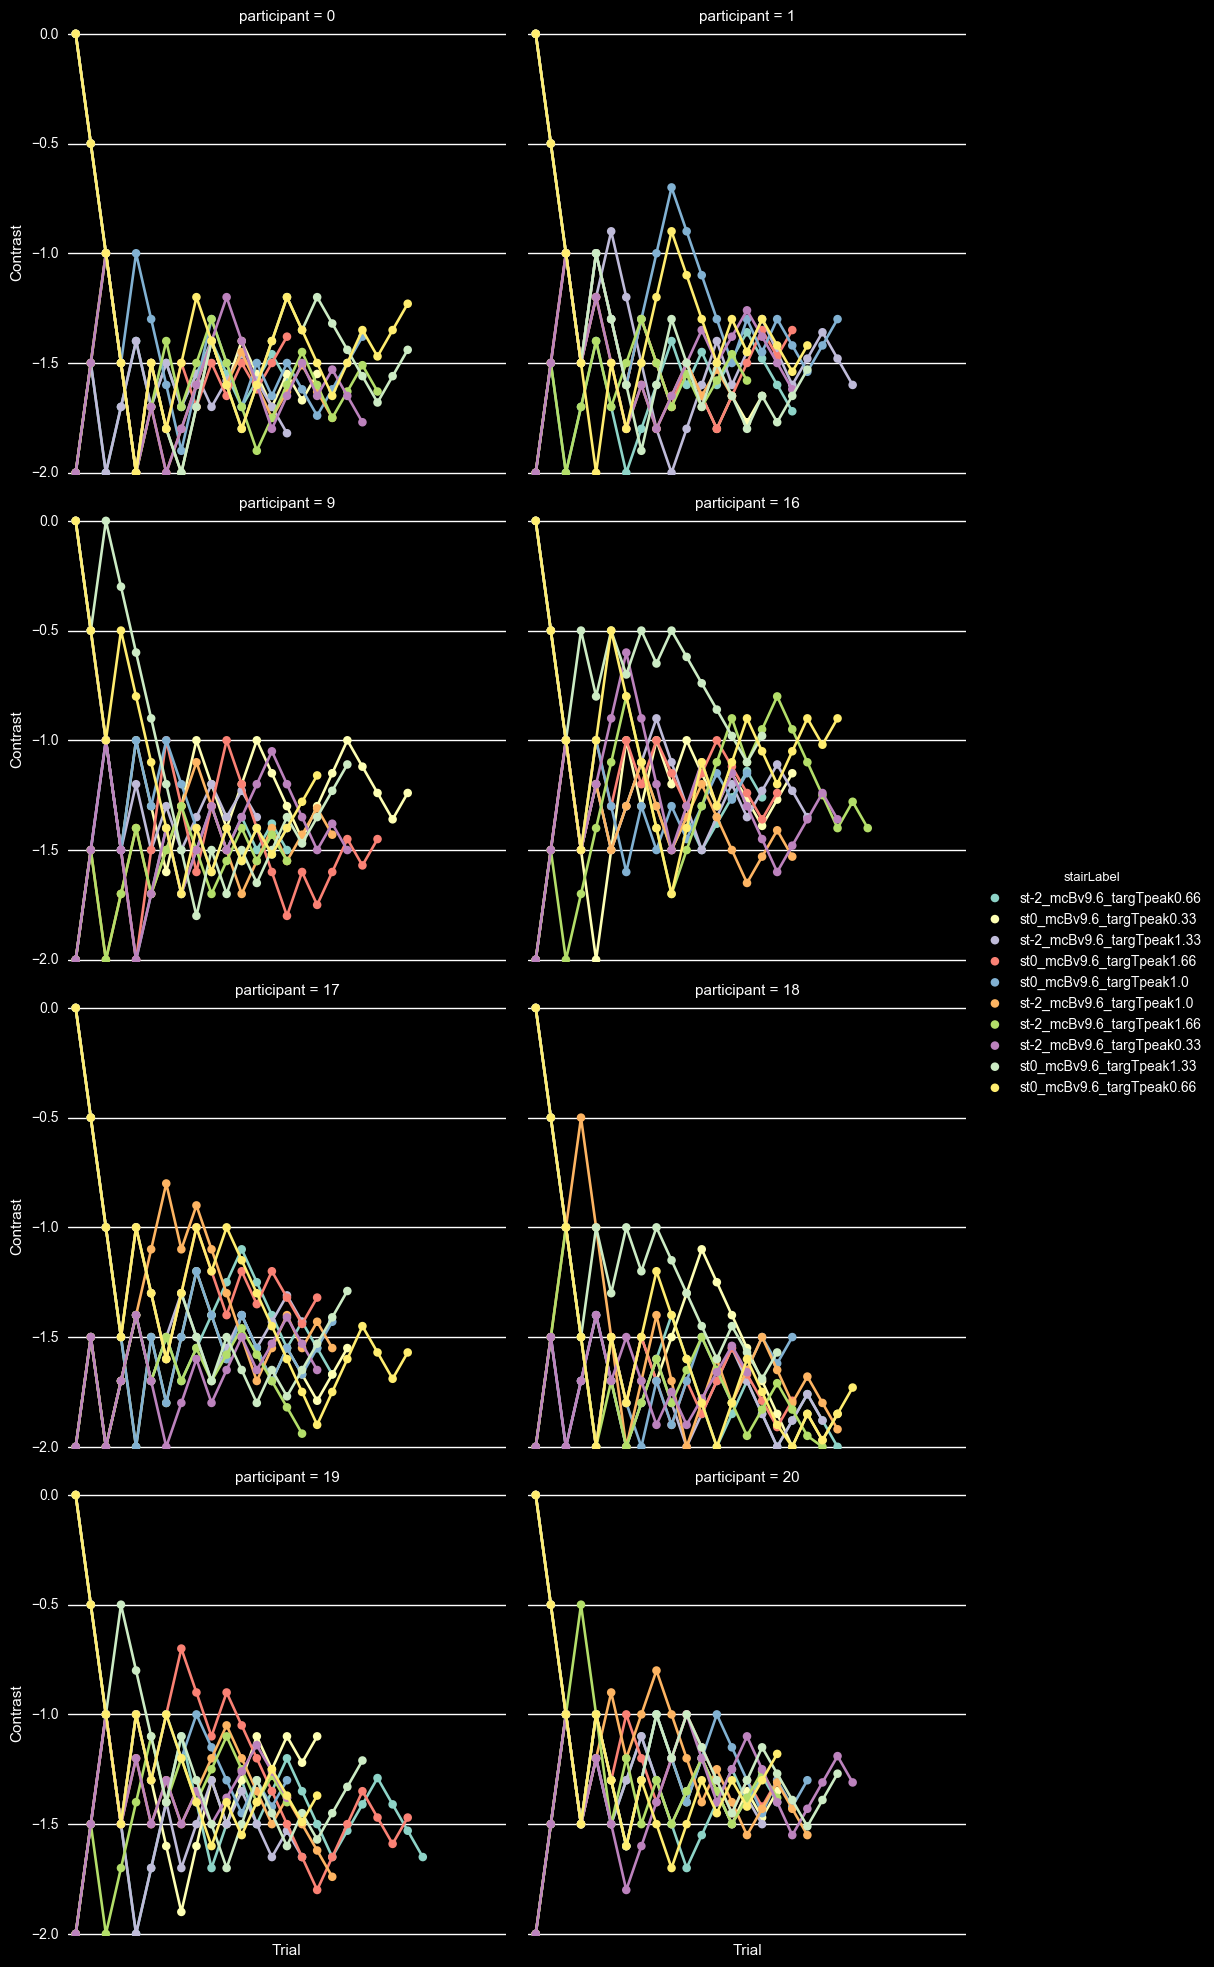

In [12]:
g = sns.factorplot(x='trialN', y='intns', hue='stairLabel', col='participant',
                   data=dfStatPeri[dfStatPeri.mcBv==9.6],
                   col_wrap=2, ci=None, kind='point', size=5, scale=.6)
g.set_axis_labels('Trial','Contrast')
g.set(xticks=[])
plt.ylim(-2.01,0.03)